# **`Supply Chain Management Forecasting Report`**

**1. Import Necessary Libraries and Load the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
data = pd.read_csv('supply_chain_data.csv')

# Display the first few rows of the dataset
print(data.head())


  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

**2. Data Cleaning and Feature Engineering**

In [ ]:
# Check the first few rows to identify categorical columns
print(data.head())

# Identify categorical columns that still contain non-numeric values
categorical_columns = ['Customer demographics', 'Inspection results']  # Add more if needed

# Apply one-hot encoding only if the column exists in the dataset
existing_categorical = [col for col in categorical_columns if col in data.columns]
data = pd.get_dummies(data, columns=existing_categorical)

# Define the target variable and features
target = 'Revenue generated'  # Ensure this column exists
if target not in data.columns:
    raise KeyError(f"Target column '{target}' not found in dataset.")

features = data.drop(columns=[target])

# Convert all features to numeric format
X_train, X_test, y_train, y_test = train_test_split(features, data[target], test_size=0.2, random_state=42)

# Ensure all data is numeric before scaling
print("Data types after encoding:", X_train.dtypes.unique())  # Should only show 'float64' or 'int64'

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Preprocessing Completed Successfully!")


       Price  Availability  Number of products sold  Revenue generated  \
0  69.808006            55                      802        8661.996792   
1  14.843523            95                      736        7460.900065   
2  11.319683            34                        8        9577.749626   
3  61.163343            68                       83        7766.836426   
4   4.805496            26                      871        2686.505152   

   Stock levels  Lead times  Order quantities  Shipping times  Shipping costs  \
0            58           7                96               4        2.956572   
1            53          30                37               2        9.716575   
2             1          10                88               2        8.054479   
3            23          13                59               6        1.729569   
4             5           3                56               8        3.890548   

   Lead time  ...  Transportation modes_Rail  Transportation modes_R

**3. Model Building**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 37465348.0000 - mae: 5542.5874 - val_loss: 51637604.0000 - val_mae: 6572.7222
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step - loss: 38807584.0000 - mae: 5674.0742 - val_loss: 51633992.0000 - val_mae: 6572.4609
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 346ms/step - loss: 38597372.0000 - mae: 5697.9185 - val_loss: 51630728.0000 - val_mae: 6572.2202
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 37080744.0000 - mae: 5515.0864 - val_loss: 51627464.0000 - val_mae: 6571.9819
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - loss: 37916200.0000 - mae: 5586.3257 - val_loss: 51624156.0000 - val_mae: 6571.7393
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 38509684.0000 - mae: 5663.4551 - val_loss: 51620656.0000 - val_mae: 6571.4795
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 38788600.0000 - mae: 5627.3652 - val_loss: 51616812.0000 - val_mae: 6571.1914
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step -

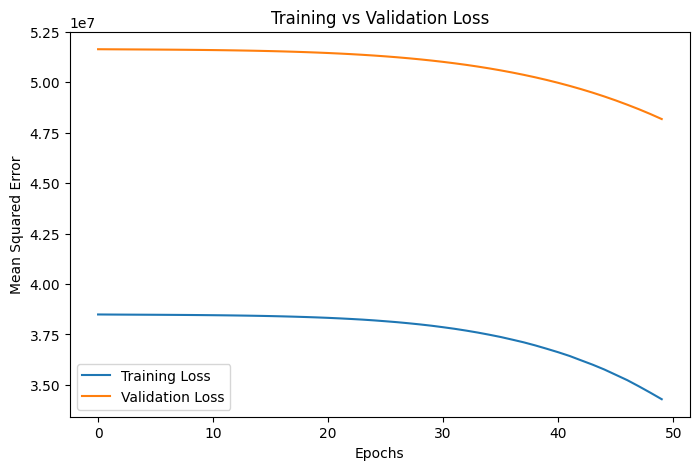

In [ ]:
# Define the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


**4. Model Evaluation**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Mean Squared Error on Test Set: 35855755.73100057


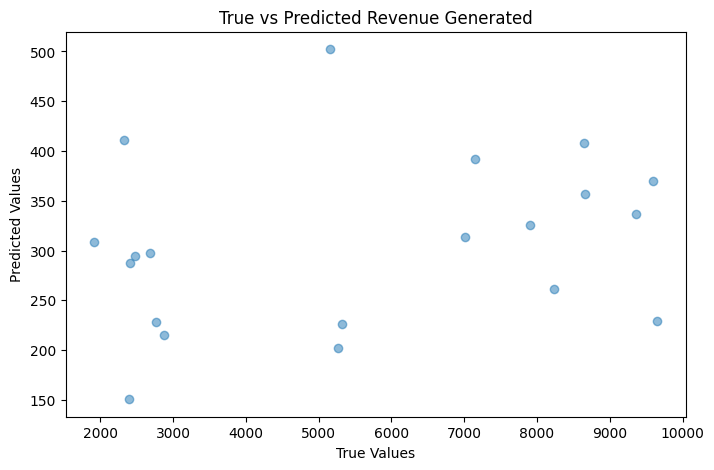

In [ ]:
from sklearn.metrics import mean_squared_error

# Evaluate the model on the test set
test_predictions = model.predict(X_test_scaled)

# Flatten predictions for compatibility with y_test
test_predictions = test_predictions.flatten()

# Compute Mean Squared Error
mse = mean_squared_error(y_test, test_predictions)
print(f'Mean Squared Error on Test Set: {mse}')

# Plot True vs Predicted Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Revenue Generated')
plt.show()


**5. Model Deployment**

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
loaded_model = load_model('supply_chain_forecasting_model.keras', compile=False)

# Ensure new_data has all 34 features (Adjust values accordingly)
new_data = np.array([[120.5, 1, 300, 5000, 0, 150, 10, 200, 5, 20, 15, 1000, 8, 3000, 90, 0.02, 200,
                      1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]])  # Ensure correct feature order

# Convert new_data into DataFrame with matching column names
import pandas as pd
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)

# Scale new data
new_data_scaled = scaler.transform(new_data_df)

# Make prediction
predicted_revenue = loaded_model.predict(new_data_scaled)
print(f'Predicted Revenue Generated: {predicted_revenue[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted Revenue Generated: 18522.9453125
